# Patterns of expression and outcome
Cases were grouped into 2 patterns of expression, basal or luminal, depending on the average values of the corresponding markers. Two approaches were used for classifying cases as either basal or luminal, as detailed below. Basal markers included CK5/6 and CD44. Luminal markers included CK20 and uroplakin.

In [1]:
# Libraries
suppressPackageStartupMessages(library(tidyverse))
library(RColorBrewer)

# Global
options(warn = -1)

# Scripts
source("summarize.R")

# Data
load("DF.Rdata")

glimpse(DF)

Observations: 411
Variables: 23
$ registry_id            <dbl> 20060035601, 19970063502, 20040008703, 2007008…
$ pt_stage               <fct> T1, T1, T2, T1, T1, T1, Tis, T1, T2, Ta, Ta, T…
$ sp_id                  <chr> "06-S-4802", "07-S-3788", "07-S-8931", "07-S-6…
$ ck56                   <dbl> 60, 10, 90, NA, NA, 5, NA, 0, 0, 40, NA, 40, 4…
$ ck20                   <dbl> 0, 0, 0, NA, 0, 70, NA, 80, 0, 0, NA, 0, 10, N…
$ cd44                   <dbl> 70, 60, NA, NA, NA, 40, NA, 5, NA, 60, NA, NA,…
$ gata3                  <dbl> 100, 100, 100, NA, 100, 100, NA, 100, 100, 100…
$ er                     <dbl> 40, 20, NA, NA, 0, 0, 0, 0, 0, 5, NA, NA, 0, N…
$ her2                   <dbl> 0, 5, NA, NA, 60, 30, NA, 40, 60, 60, NA, 30, …
$ uroplakin              <dbl> 5, 20, NA, NA, NA, 0, NA, 10, NA, 0, NA, NA, 0…
$ sex                    <fct> Male, Male, Male, Male, Male, Male, Female, Ma…
$ death                  <fct> Dead, Alive, Dead, Alive, Alive, Alive, Alive,…
$ progression_stage_

## Pattern 1: Maximum average value
A case was classified as having a basal pattern if CK5/6 or CD44 showed the highest average value among all markers, and as having a luminal pattern if CK20 or uroplakin showed the highest average value among all markers.

In [2]:
PATTERN_1 <- DF %>% 
  gather(biomarker, expression, ck56, cd44, ck20, uroplakin, na.rm = TRUE) %>% 
  mutate(biomarker = factor(biomarker)) %>% 
  group_by(sp_id, biomarker) %>% 
  summarize(
    expression = mean(expression, na.rm = TRUE),
    recurrence_next = unique(recurrence_next),
    recurrence_any = unique(recurrence_any),
    grade_next = unique(progression_grade_next),
    grade_any = unique(progression_grade_any),
    stage_next = unique(progression_stage_next),
    stage_any = unique(progression_stage_any)
  ) %>% 
  # Selecting rows showing the maximum median expression
  slice(which.max(expression)) %>% 
  # Recoding the labels according to biomarker type (basal vs luminal)
  mutate(
    biomarker = fct_recode(biomarker,
      "Basal" = "ck56",
      "Basal" = "cd44",
      "Luminal" = "ck20",
      "Luminal" = "uroplakin"
    )
  ) %>% 
  ungroup()

glimpse(PATTERN_1)

Observations: 121
Variables: 9
$ sp_id           <chr> "01-S-10015", "01-S-7500", "01-S-9347", "02-S-9202", …
$ biomarker       <fct> Basal, Luminal, Basal, Basal, Luminal, Basal, Luminal…
$ expression      <dbl> 30.00000, 23.33333, 43.33333, 26.00000, 76.66667, 30.…
$ recurrence_next <fct> No tumor recurrence, Tumor recurrence, Tumor recurren…
$ recurrence_any  <fct> Tumor recurrence, Tumor recurrence, Tumor recurrence,…
$ grade_next      <fct> No grade progression, No grade progression, No grade …
$ grade_any       <fct> No grade progression, No grade progression, No grade …
$ stage_next      <fct> No stage progression, No stage progression, No stage …
$ stage_any       <fct> No stage progression, No stage progression, No stage …


In [3]:
# A function to create filled bar plots with P values

plot_bar <- function(data, pattern, outcome) {
  
  # Creating the dataset
  pattern = enquo(pattern)
  outcome = enquo(outcome)
  df <- data %>%
    select(pattern = !! pattern, outcome = !! outcome)
  
  # Estimating P value using the chi-squared test
  pval <- with(df, chisq.test(pattern, outcome))$p.value %>% 
    formatC(digits = 2, format = "fg", flag = "#")
  
  # Ploting the bars
  g <- df %>% 
    filter(!is.na(outcome)) %>% 
    ggplot(aes(x = pattern, fill = outcome)) +
    geom_bar(position = "fill", color = "black", size = 0.25) +
    scale_fill_brewer(palette = "Blues") +
    labs(x = "", y = "") +
    theme(legend.position = "none") +
    annotate("label", label = paste0("P=", pval), x = 1.5, y = 1)
  
  # Returning the plot object
  return(g)

}

### Tumor recurrence at next biopsy

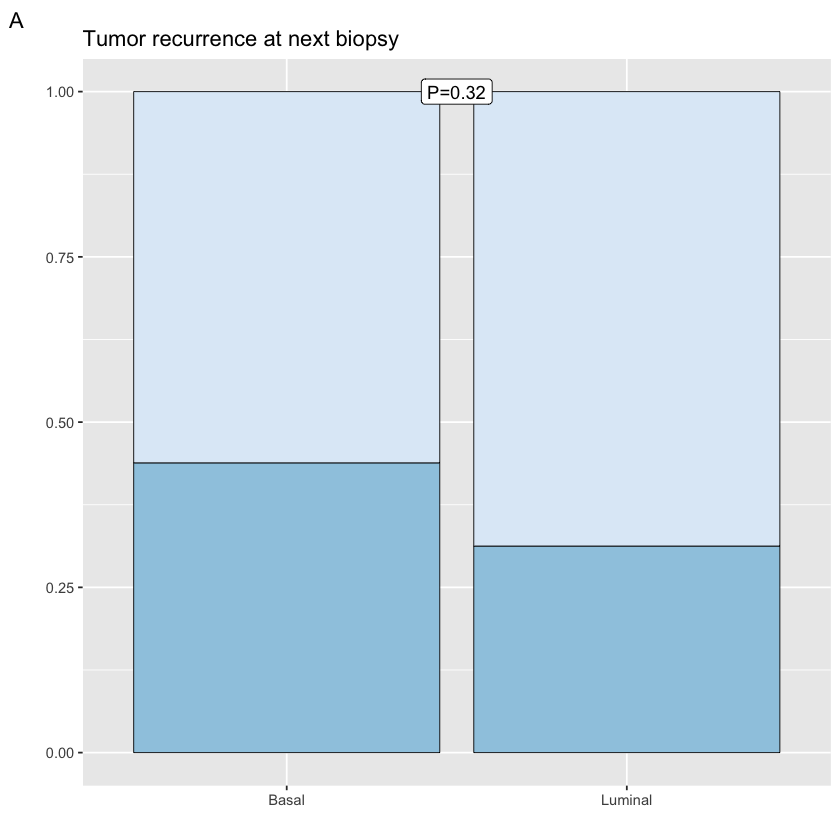

In [4]:
Pattern_1A <- PATTERN_1 %>% plot_bar(biomarker, recurrence_next) +
  labs(title = "Tumor recurrence at next biopsy", tag = "A")

Pattern_1A

### Tumor recurrence at any biopsy

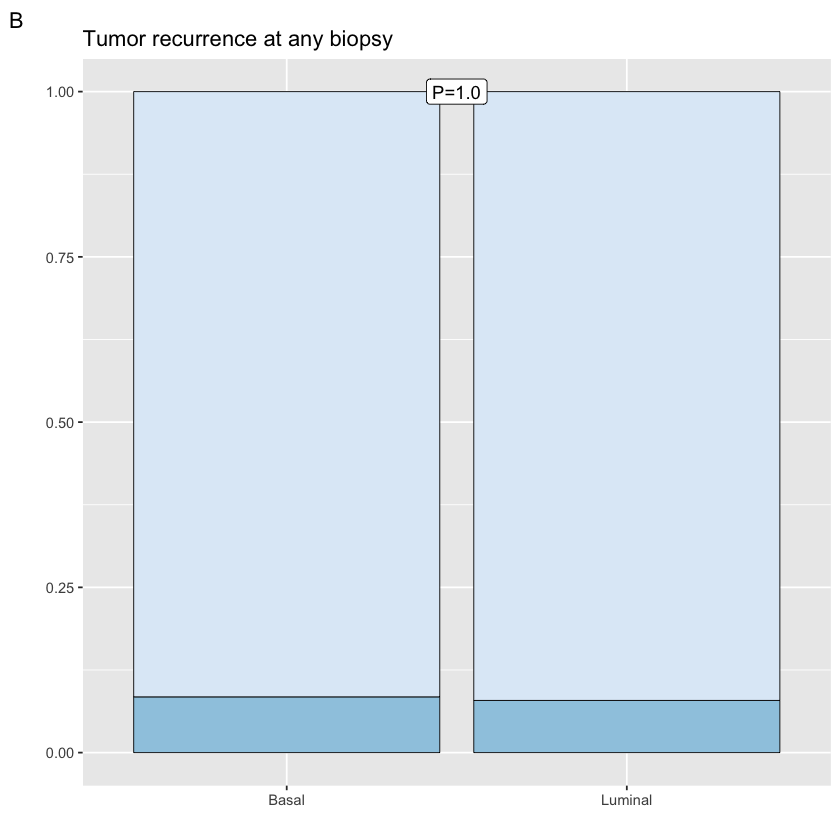

In [5]:
Pattern_1B <- PATTERN_1 %>% plot_bar(biomarker, recurrence_any) +
  labs(title = "Tumor recurrence at any biopsy", tag = "B")

Pattern_1B

### Tumor grade progression at next biopsy

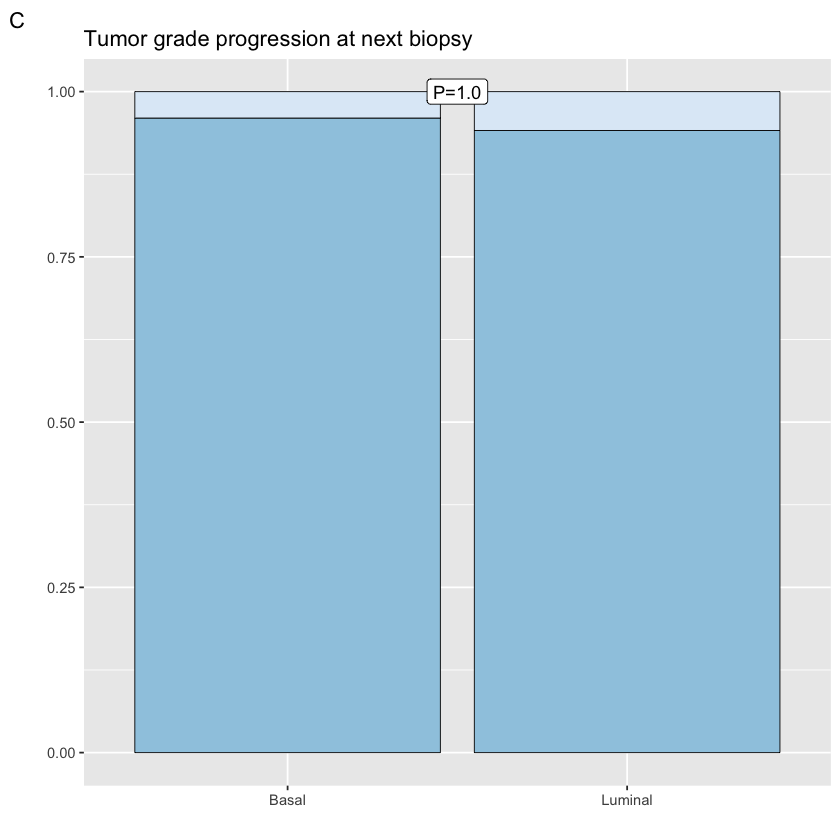

In [6]:
Pattern_1C <- PATTERN_1 %>% plot_bar(biomarker, grade_next) +
  labs(title = "Tumor grade progression at next biopsy", tag = "C")

Pattern_1C

### Tumor grade progression at any biopsy

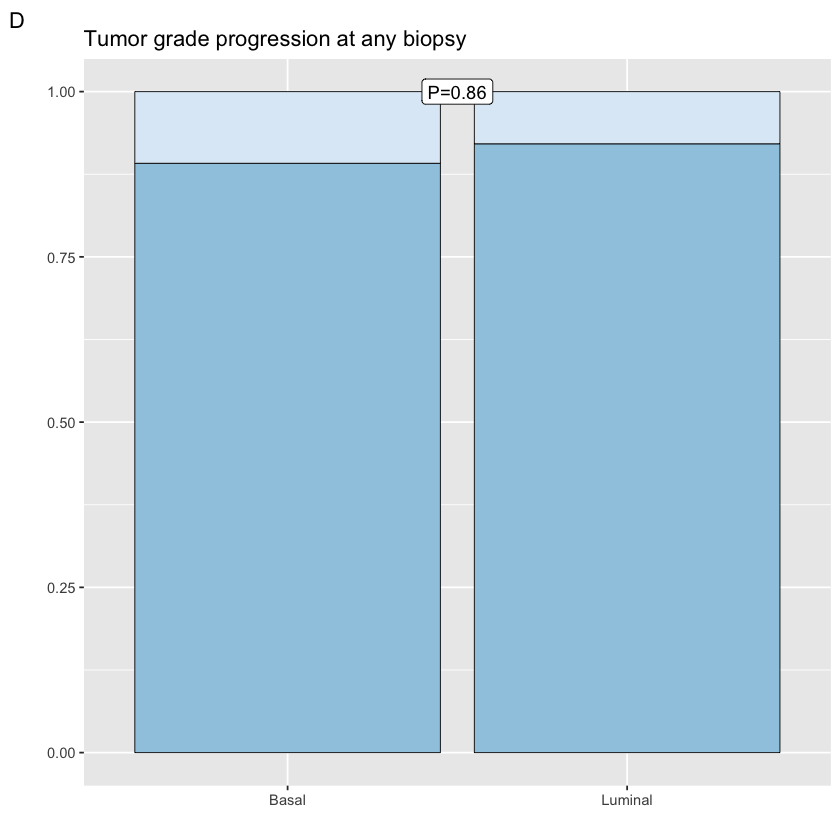

In [7]:
Pattern_1D <- PATTERN_1 %>% plot_bar(biomarker, grade_any) +
  labs(title = "Tumor grade progression at any biopsy", tag = "D")

Pattern_1D

### Tumor stage progression at next biopsy

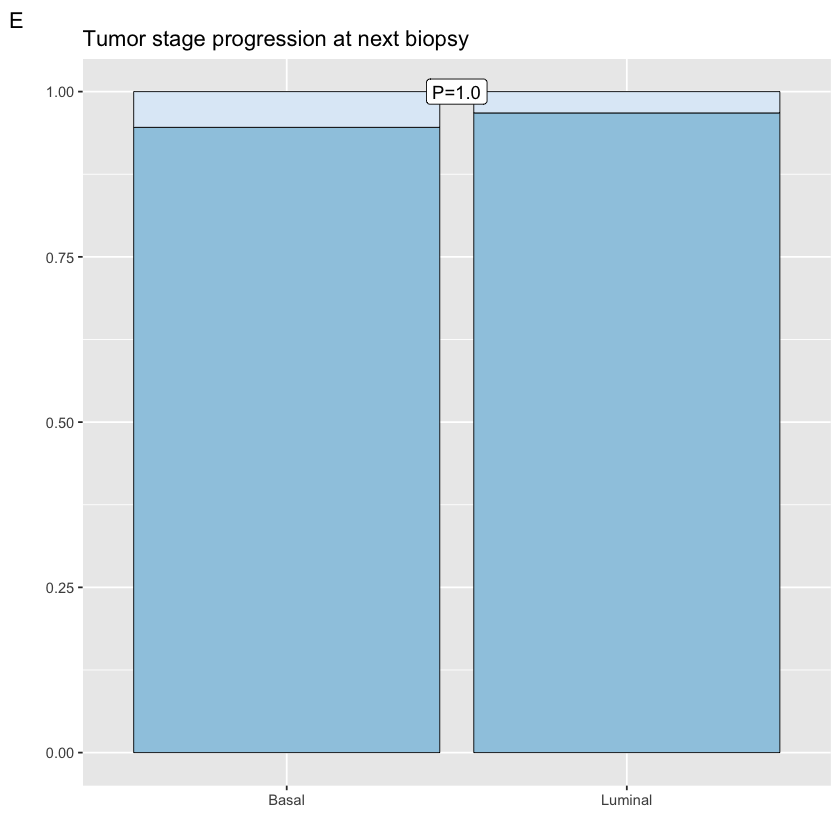

In [8]:
Pattern_1E <- PATTERN_1 %>% plot_bar(biomarker, stage_next) +
  labs(title = "Tumor stage progression at next biopsy", tag = "E")

Pattern_1E

### Tumor stage progression at any biopsy

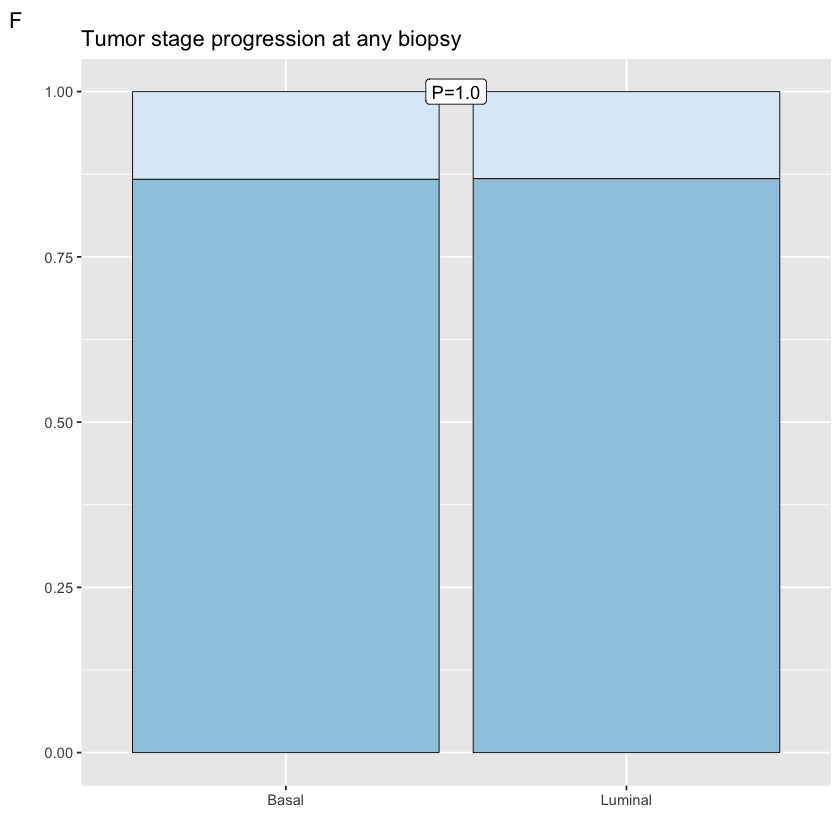

In [9]:
Pattern_1F <- PATTERN_1 %>% plot_bar(biomarker, stage_any) +
  labs(title = "Tumor stage progression at any biopsy", tag = "F")

Pattern_1F

### Combined plots
**Basal vs luminal expression and outcome.** Each case was categorized as having either a basal or luminal pattern based on which marker had the highest mean value. A case was categorized as having a basal pattern if CK5/6 or CD44 showed the highest mean value. A case was categorized as having a luminal pattern if CK20 or uroplakin showed the highest mean value. Lighter bars correspond to presence of the event (i.e., recurrence or progression) while darker bars correspond to absence of the event. Labels on top of the bars correspond to P values from chi-squared tests.

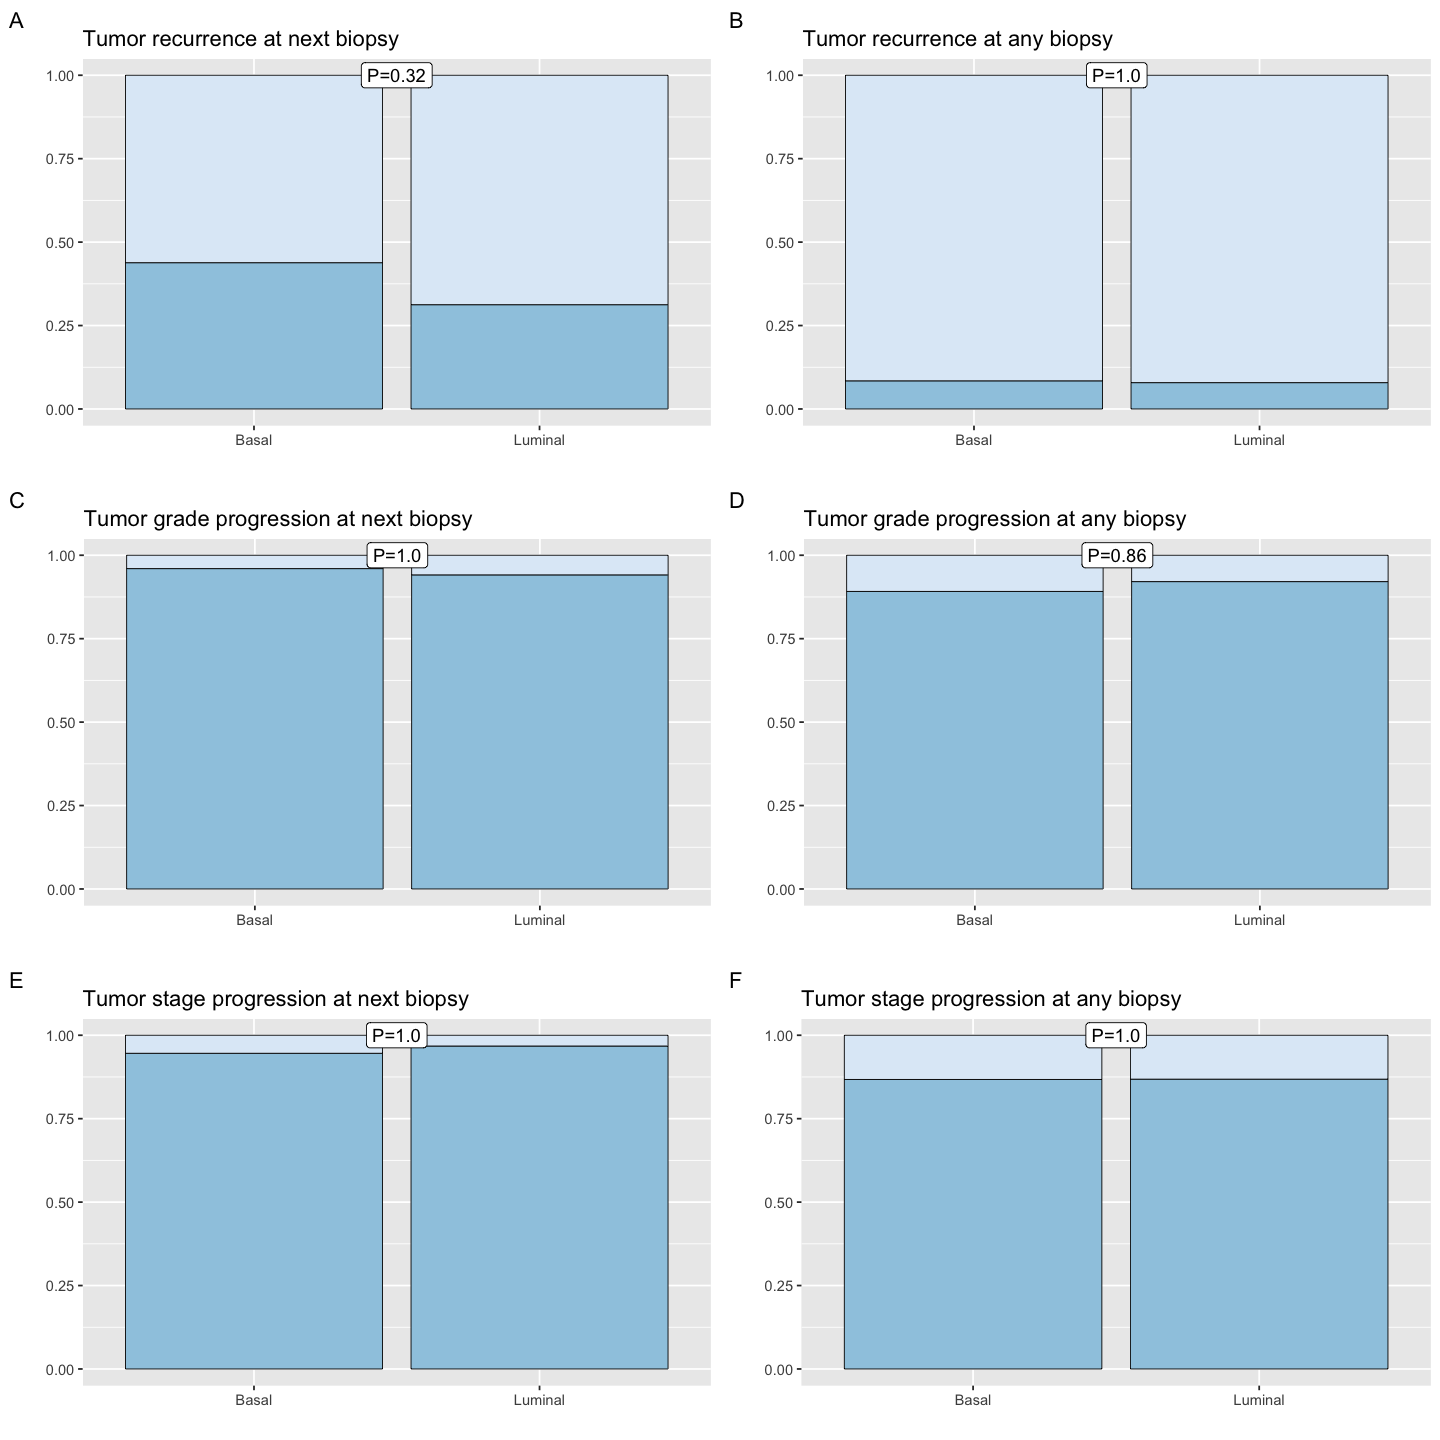

In [10]:
options(repr.plot.width = 12, repr.plot.height = 12)

Pattern_1 <- gridExtra::grid.arrange(
  Pattern_1A, Pattern_1B, Pattern_1C, Pattern_1D, Pattern_1E, Pattern_1F,
  ncol = 2
)

In [11]:
ggsave(
  filename = "Figs/BL-NMIBUC-Pattern1.png",
  Pattern_1,
  width = 12,
  height = 12,
  units = "in"
)

## Pattern 2: Maximum value of the sum of means
Each case was categorized as having a basal or luminal pattern based on which group of markers had the highest sum of mean values. A case was categorized as having a basal pattern if the sum of the mean values of CK5/6 and CD44 was higher than the sum of the mean values of CK20 and uroplakin. The case was categorized as having aluminal pattern otherwise.

In [12]:
options(repr.plot.width = 7, repr.plot.height = 7)

PATTERN_2 <- DF %>% 
  # Gathering the data to calculate mean values by SP and biomarker
  gather(biomarker, expression, ck56, cd44, ck20, uroplakin, na.rm = TRUE) %>% 
  group_by(sp_id, biomarker) %>% 
  summarize(
    expression = mean(expression, na.rm = TRUE),
    recurrence_next = unique(recurrence_next),
    recurrence_any = unique(recurrence_any),
    grade_next = unique(progression_grade_next),
    grade_any = unique(progression_grade_any),
    stage_next = unique(progression_stage_next),
    stage_any = unique(progression_stage_any)
  ) %>% 
  # Spreading the data to sum the rows of basal and luminal marker values
  spread(key = biomarker, value = expression) %>% 
  mutate(
    ck56cd44 = ck56 + cd44,
    ck20uroplakin = ck20 + uroplakin
  ) %>% 
# Gathering again the data to select rows with the maximum value
  gather(biomarker, expression, ck56cd44, ck20uroplakin) %>% 
  mutate (biomarker = factor(biomarker)) %>% 
  slice(which.max(expression)) %>% 
  # Recoding the labels according to biomarker type (basal vs luminal)
  mutate(
    biomarker = fct_recode(biomarker,
      "Basal" = "ck56cd44",
      "Luminal" = "ck20uroplakin"
    )
  ) %>% 
  ungroup()

glimpse(PATTERN_2)

Observations: 114
Variables: 13
$ sp_id           <chr> "01-S-10015", "01-S-7500", "01-S-9347", "02-S-9202", …
$ recurrence_next <fct> No tumor recurrence, Tumor recurrence, Tumor recurren…
$ recurrence_any  <fct> Tumor recurrence, Tumor recurrence, Tumor recurrence,…
$ grade_next      <fct> No grade progression, No grade progression, No grade …
$ grade_any       <fct> No grade progression, No grade progression, No grade …
$ stage_next      <fct> No stage progression, No stage progression, No stage …
$ stage_any       <fct> No stage progression, No stage progression, No stage …
$ cd44            <dbl> 30.000000, 15.000000, 43.333333, 26.000000, 38.333333…
$ ck20            <dbl> 10.000000, 23.333333, 30.000000, 25.000000, 76.666667…
$ ck56            <dbl> 5.000000, 3.333333, 10.000000, 11.000000, 15.000000, …
$ uroplakin       <dbl> 0.0000000, 0.0000000, 6.6666667, 6.6666667, 21.666666…
$ biomarker       <fct> Basal, Luminal, Basal, Basal, Luminal, Basal, Luminal…
$ expression      <d

### Tumor recurrence at next biopsy

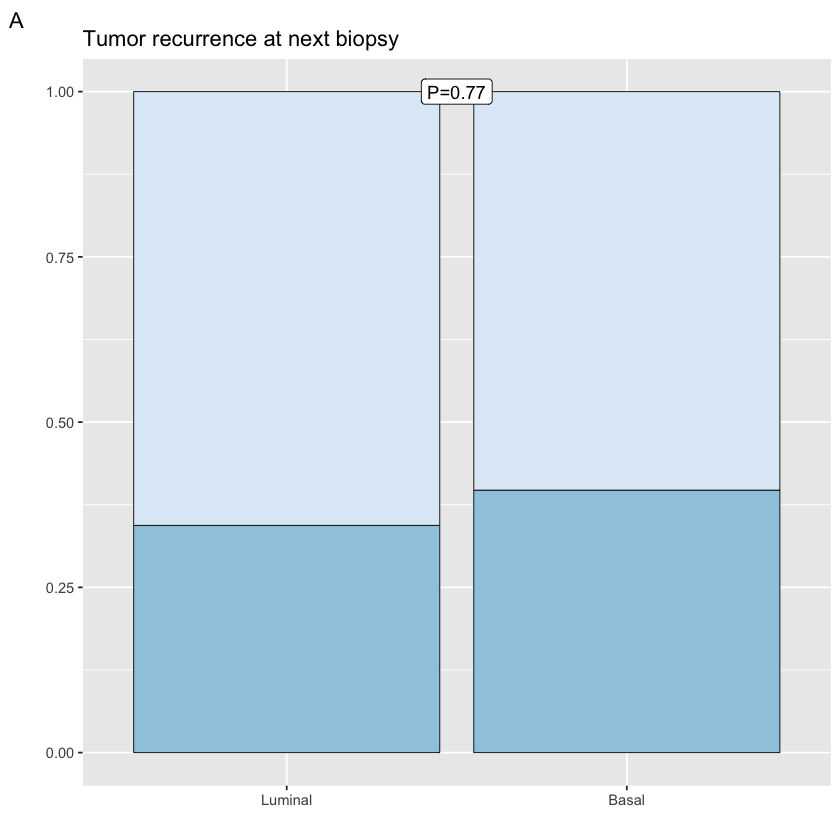

In [13]:
Pattern_2A <- PATTERN_2 %>% plot_bar(biomarker, recurrence_next) +
  labs(title = "Tumor recurrence at next biopsy", tag = "A")

Pattern_2A

### Tumor recurrence at any biopsy

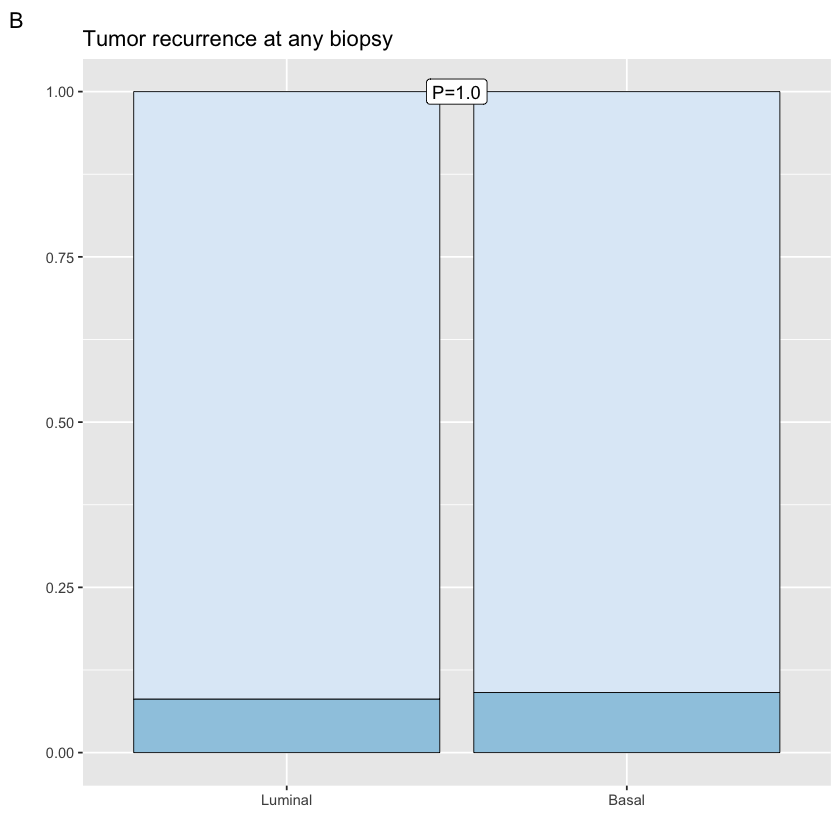

In [14]:
Pattern_2B <- PATTERN_2 %>% plot_bar(biomarker, recurrence_any) +
  labs(title = "Tumor recurrence at any biopsy", tag = "B")

Pattern_2B

### Tumor grade progression at next biopsy

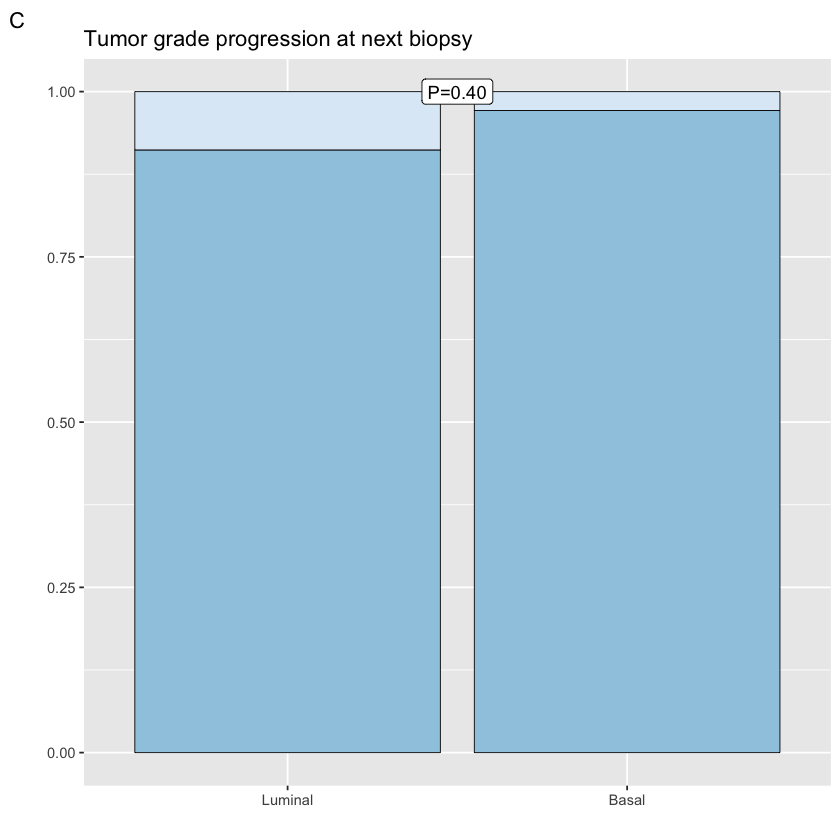

In [15]:
Pattern_2C <- PATTERN_2 %>% plot_bar(biomarker, grade_next) +
  labs(title = "Tumor grade progression at next biopsy", tag = "C")

Pattern_2C

### Tumor grade progression at any biopsy

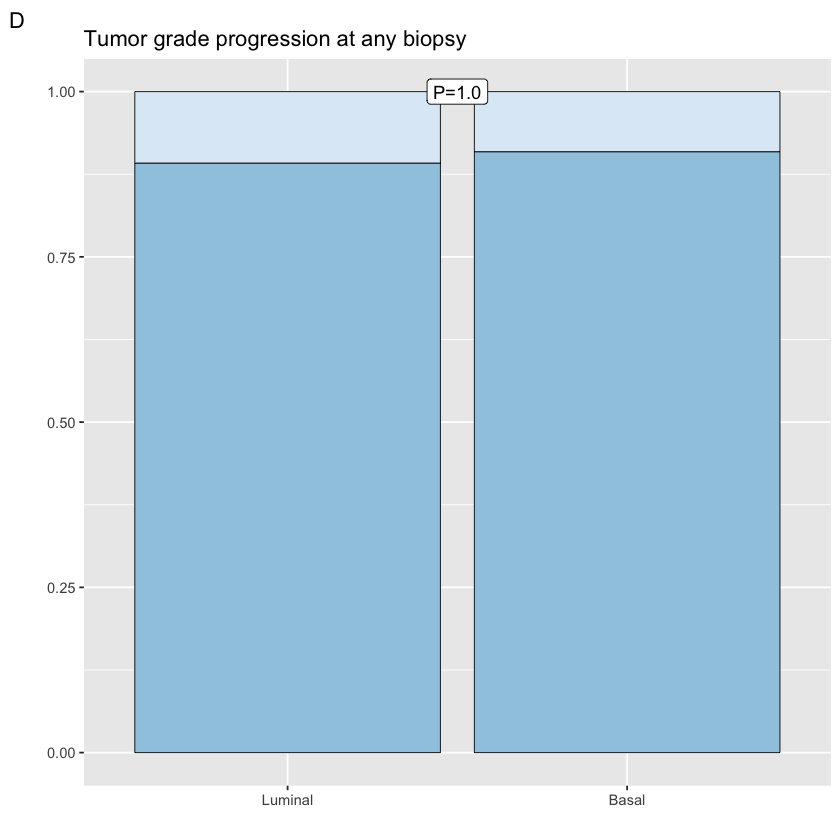

In [16]:
Pattern_2D <- PATTERN_2 %>% plot_bar(biomarker, grade_any) +
  labs(title = "Tumor grade progression at any biopsy", tag = "D")

Pattern_2D

### Tumor stage progression at next biopsy

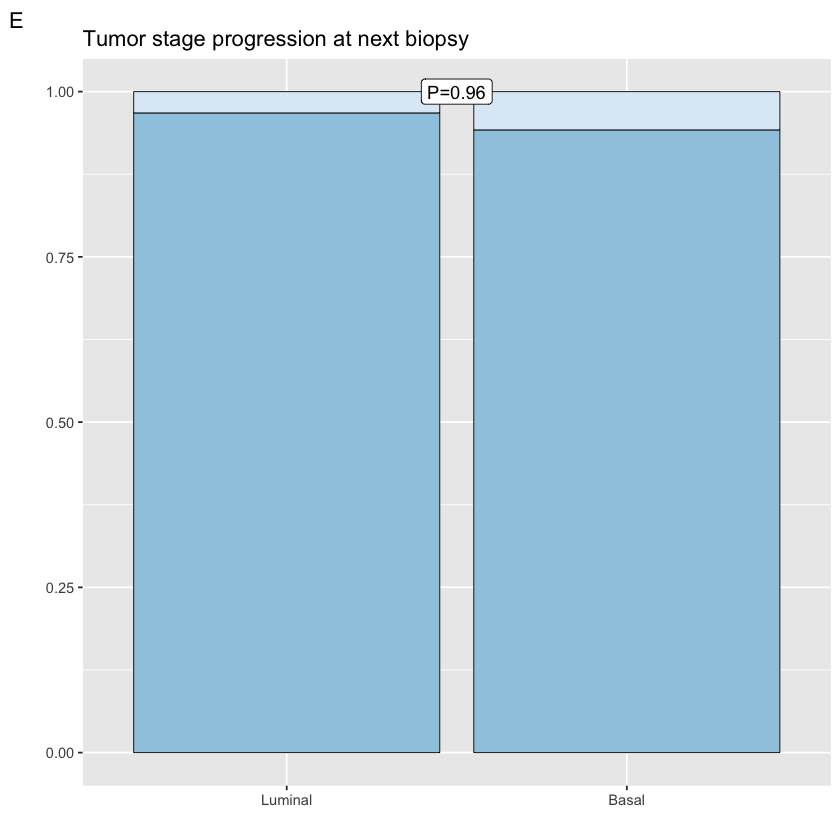

In [17]:
Pattern_2E <- PATTERN_2 %>% plot_bar(biomarker, stage_next) +
  labs(title = "Tumor stage progression at next biopsy", tag = "E")

Pattern_2E

### Tumor stage progression at any biopsy

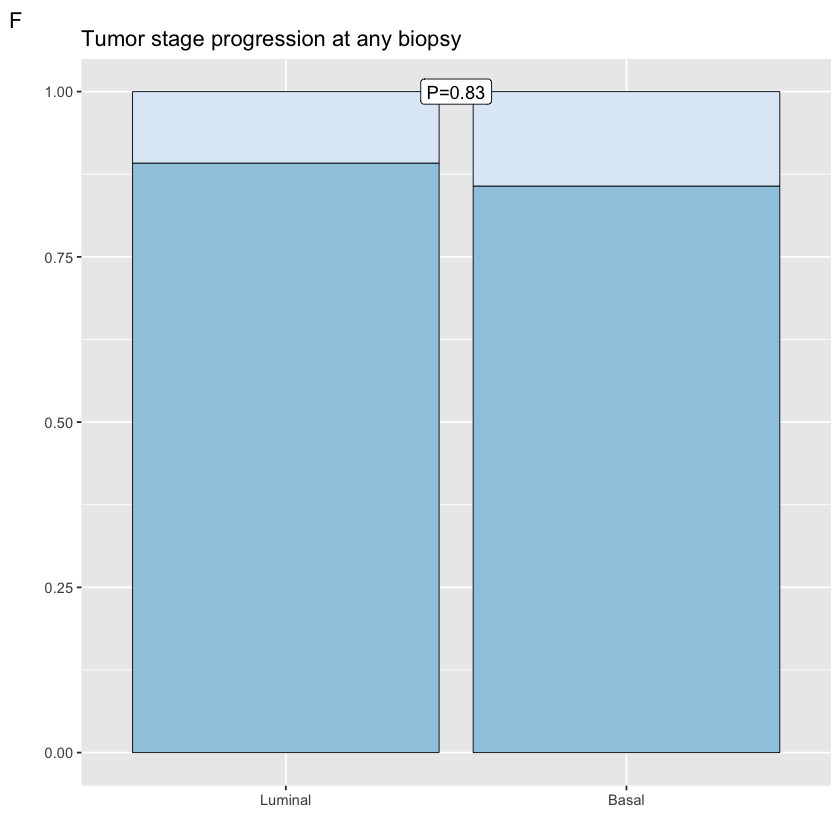

In [18]:
Pattern_2F <- PATTERN_2 %>% plot_bar(biomarker, stage_any) +
  labs(title = "Tumor stage progression at any biopsy", tag = "F")

Pattern_2F

### Combined plots
**Basal vs luminal expression and outcome.** Each case was categorized as having either basal or luminal pattern based on which group of markers had the highest sum of mean values. A case was categorized as having a basal pattern if the sum of the mean values of CK5/6 and CD44 was higher than the sum of mean values of CK20 and uroplakin. The case was categorized as having a luminal pattern otherwise. Lighter bars correspond to presence of the event (i.e., recurrence or progression) while darker bars correspond to absence of the event. Labels on top of the bars correspond to P values from chi-squared tests.

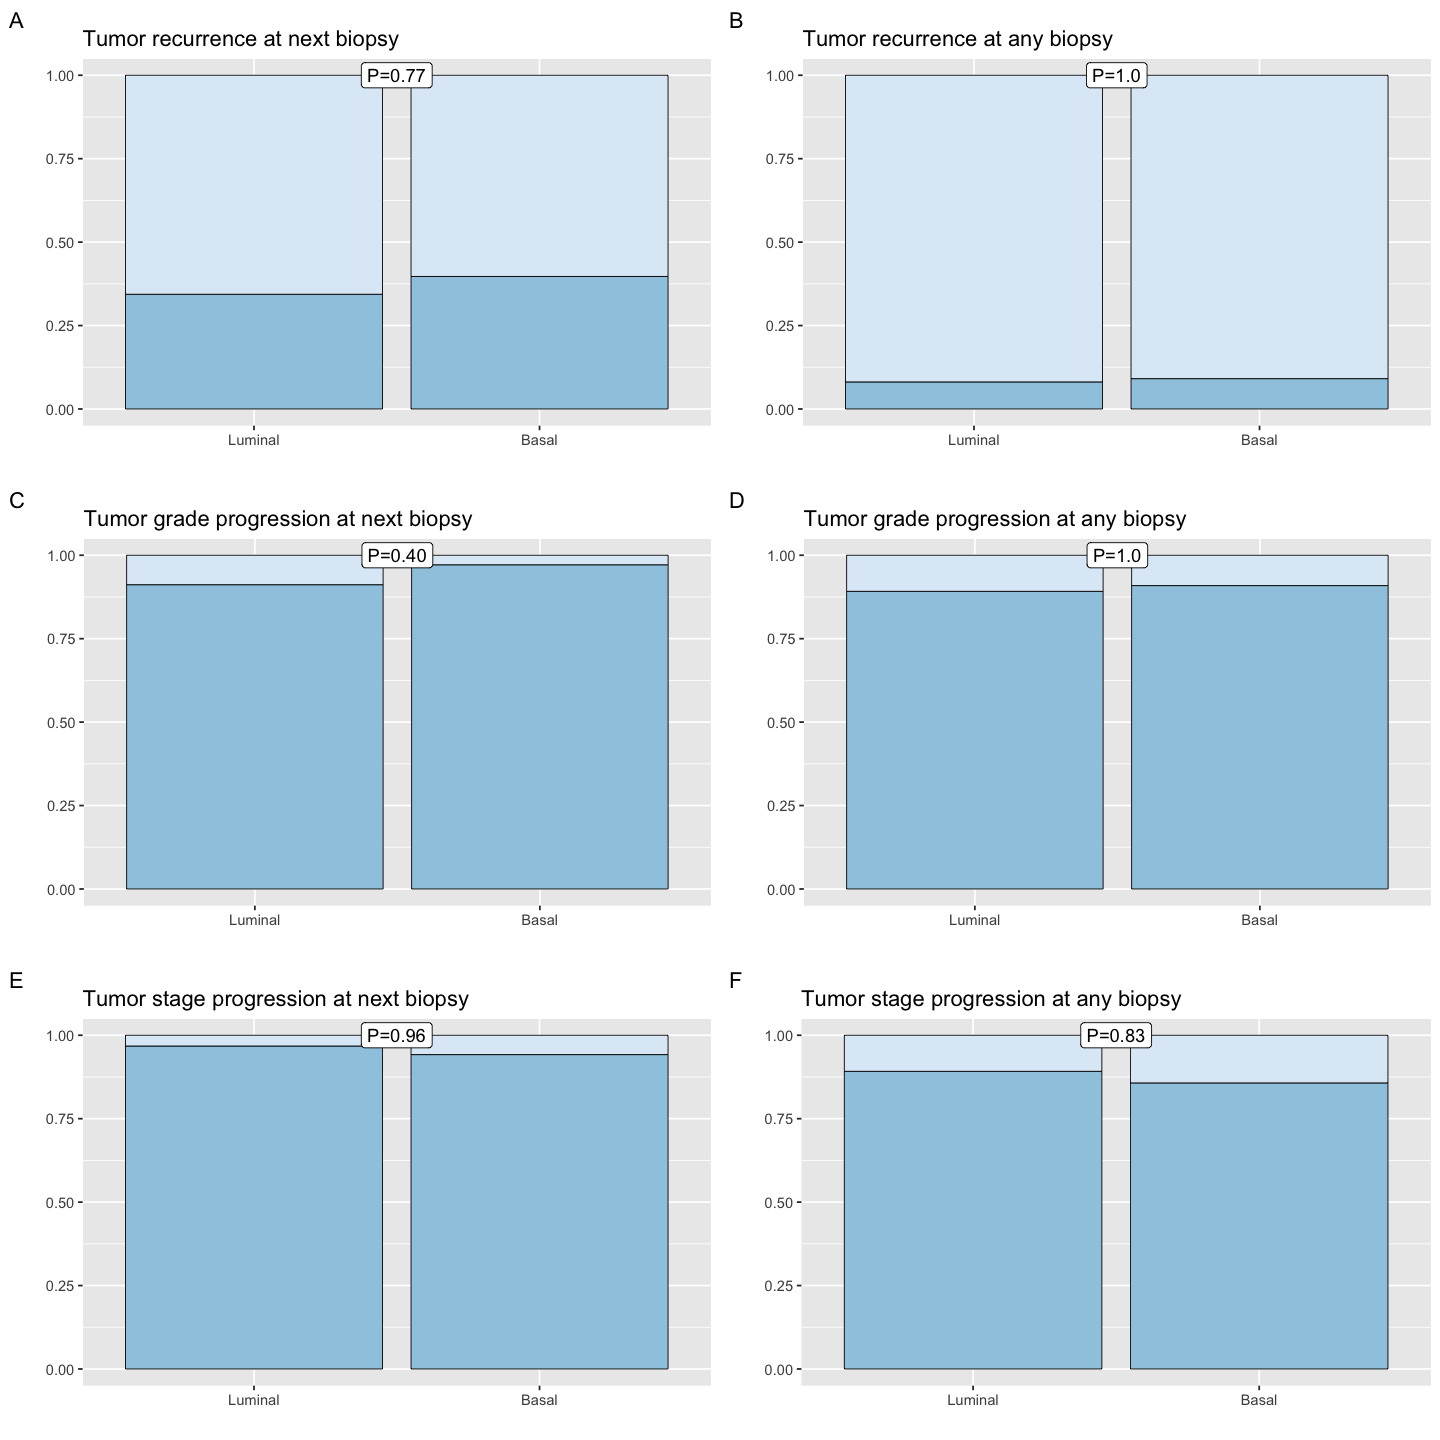

In [19]:
options(repr.plot.width = 12, repr.plot.height = 12)

Pattern_2 <- gridExtra::grid.arrange(
  Pattern_2A, Pattern_2B, Pattern_2C, Pattern_2D, Pattern_2E, Pattern_2F,
  ncol = 2
)

In [20]:
ggsave(
  filename = "Figs/BL-NMIBUC-Pattern2.png",
  Pattern_2,
  width = 12,
  height = 12,
  units = "in"
)